<a href="https://colab.research.google.com/github/eyaguirat10/Explainable-AI-Workshop/blob/main/Notebook_XAI_Eya_Guirat_4DS10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Explainable AI Workshop***

---



# **Objectives:**

* Build a machine learning model to predict customer churn.

* Perform a global explanation of the model's behavior using an appropriate global explanation method.

* Conduct a local analysis to explain individual predictions using a suitable local explanation technique.


**Customer Churn dataset:**

The aim is to estimate whether a bank's customers leave the bank or not.

The event that defines the customer abandonment is the closing of the customer's bank account.

**Data Set Story:**
It consists of 10000 observations and 12 variables.
Independent variables contain information about customers.
Dependent variable refers to customer abandonment.
**Features:**
* Surname: Surname
* CreditScore: Credit score
* Geography: Country (Germany / France / Spain)
* Gender: Gender (Female / Male)
* Age: Age
* Tenure: How many years of customer
* Balance: Balance
* NumOfProducts: Bank product used
* HasCrCard: Credit card status (0 = No, 1 = Yes)
* IsActiveMember: Active membership status (0 = No, 1 = Yes)
* EstimatedSalary: Estimated salary
* Exited: Abandoned or not? (0 = No, 1 = Yes)


In [ ]:
!pip install lime

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import lime
import lime.lime_tabular

# Print XAI definition
print("Explainable AI (XAI): Methods and techniques that make AI systems' decisions more transparent and interpretable to humans.")

Explainable AI (XAI): Methods and techniques that make AI systems' decisions more transparent and interpretable to humans.


In [ ]:
# read data
data = pd.read_csv('churn_problem.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data = data.drop(['RowNumber', 'CustomerId','Surname'], axis=1)


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Geography']= label_encoder.fit_transform(data['Geography'])

data['Geography'].unique()

array([0, 2, 1])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])

data['Gender'].unique()

array([0, 1])

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# data = data.select_dtypes(exclude=['object'])


In [ ]:
# Split the data
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Preprocessed data shape:", X.shape)
print("Target variable distribution:")
print(y.value_counts(normalize=True))

Preprocessed data shape: (10000, 10)
Target variable distribution:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


* 0 = the customer has not left (no "Exited")

* 1 = the customer has left (yes "Exited")

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
X_test.shape

(2000, 10)

#Interpretable ML

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000

Confusion Matrix:
[[1556   51]
 [ 317   76]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Global Explanation

In [ ]:
import pandas as pd
import numpy as np

# Extract feature names and coefficients
coefficients = log_reg.coef_[0]
feature_importance_lr = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

feature_importance_lr


,Feature,Coefficient
1,Geography,2.520359e-01
3,Age,6.358505e-02
5,Balance,4.018188e-06
9,EstimatedSalary,-5.210544e-07
0,CreditScore,-2.639204e-03
4,Tenure,-3.173269e-02
6,NumOfProducts,-8.923438e-02
7,HasCrCard,-1.247477e-01
2,Gender,-5.069731e-01
8,IsActiveMember,-1.129779e+00


<Axes: title={'center': 'Logistic Regression Coefficients'}, ylabel='Feature'>

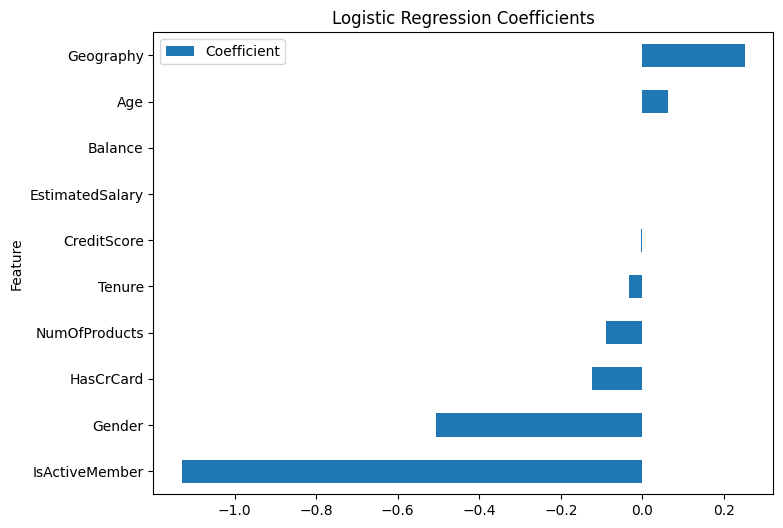

In [ ]:
feature_importance_lr.sort_values("Coefficient", ascending=True).plot(
    x="Feature", y="Coefficient", kind="barh", figsize=(8,6),
    title="Logistic Regression Coefficients"
)


this observation reveals that Geography, IsActiveMember and Gender are the main contributors to churn prediction. Positive coefficients increase the probability of churn, while negative coefficients strongly reduce churn risk. Some features such as CreditScore and EstimatedSalary have almost no linear effect, which explains why Logistic Regression performs differently from the Random Forest model.

##Local Explanation

In [ ]:
i = 0
single_example = X_test.iloc[i]

print("Selected customer data:")
print(single_example)

# Compute contribution = feature_value * coefficient
contribution = single_example * coefficients

local_explanation = pd.DataFrame({
    "Feature": X.columns,
    "Value": single_example.values,
    "Coefficient": coefficients,
    "Contribution": contribution
}).sort_values(by="Contribution", ascending=False)

local_explanation


Selected customer data:
CreditScore          596.00
Geography              1.00
Gender                 1.00
Age                   32.00
Tenure                 3.00
Balance            96709.07
NumOfProducts          2.00
HasCrCard              0.00
IsActiveMember         0.00
EstimatedSalary    41788.37
Name: 6252, dtype: float64


,Feature,Value,Coefficient,Contribution
Age,Age,32.00,6.358505e-02,2.034722
Balance,Balance,96709.07,4.018188e-06,0.388595
Geography,Geography,1.00,2.520359e-01,0.252036
IsActiveMember,IsActiveMember,0.00,-1.129779e+00,-0.000000
HasCrCard,HasCrCard,0.00,-1.247477e-01,-0.000000
EstimatedSalary,EstimatedSalary,41788.37,-5.210544e-07,-0.021774
Tenure,Tenure,3.00,-3.173269e-02,-0.095198
NumOfProducts,NumOfProducts,2.00,-8.923438e-02,-0.178469
Gender,Gender,1.00,-5.069731e-01,-0.506973
CreditScore,CreditScore,596.00,-2.639204e-03,-1.572965


Logistic Regression provides a transparent explanation for each prediction.
For this customer, the strongest positive factor was Age, contributing +2.03 to the log-odds of churn, while CreditScore was the strongest negative factor, contributing –1.57. Additional smaller contributions were made by Gender (–0.51), Geography (+0.25), and Balance (+0.39).
Features such as EstimatedSalary and HasCrCard had very small or zero influence.
This demonstrates how interpretable models allow us to understand precisely why a prediction was made for an individual case.

#Explainable ML

##Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model
test_accuracy = rf_classifier.score(X_test, y_test)

# print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8645


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probability predictions
y_proba_original = rf_classifier.predict_proba(x_test_scaled)[:, 1]

# ROC curve
fpr_original, tpr_original, _ = roc_curve(y_test, y_proba_original)
auc_original = roc_auc_score(y_test, y_proba_original)

print("AUC (Original Random Forest):", auc_original)


AUC (Original Random Forest): 0.5164373106843312


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###**Global Explanation**

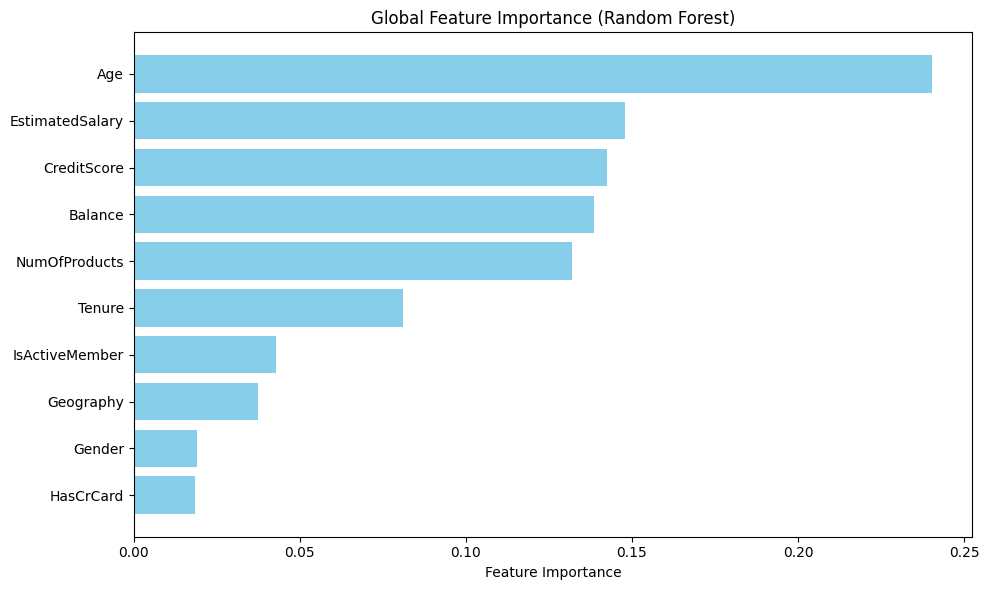

In [ ]:
import matplotlib.pyplot as plt
# Get feature importances
importances = rf_classifier.feature_importances_
features = X.columns

# Plot top 10 important features
top_indices = importances.argsort()[::-1][:10]
plt.figure(figsize=(10, 6))
plt.barh(features[top_indices][::-1], importances[top_indices][::-1], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Global Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

**Train Random Forest WITHOUT Age**

In [ ]:
# Remove Age from features
X_no_age = X.drop(columns=["Age"])

# Train-test split again
X_train_no_age, X_test_no_age, y_train_no_age, y_test_no_age = train_test_split(
    X_no_age, y, test_size=0.2, random_state=42
)

# Train RF again
rf_no_age = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_age.fit(X_train_no_age, y_train_no_age)

# Evaluate
y_pred_no_age = rf_no_age.predict(X_test_no_age)
print(classification_report(y_test_no_age, y_pred_no_age))


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1607
           1       0.61      0.34      0.44       393

    accuracy                           0.83      2000
   macro avg       0.73      0.64      0.67      2000
weighted avg       0.81      0.83      0.81      2000



In [ ]:
# Probability predictions
y_proba_no_age = rf_no_age.predict_proba(X_test_no_age)[:, 1]

# ROC curve
fpr_no_age, tpr_no_age, _ = roc_curve(y_test_no_age, y_proba_no_age)
auc_no_age = roc_auc_score(y_test_no_age, y_proba_no_age)

print("AUC - RF Without Age:", auc_no_age)


AUC - RF Without Age: 0.7932146414145493


**Train Random Forest WITHOUT EstimatedSalary AND CreditScore**

In [ ]:
X_no_salary_score = X.drop(columns=["EstimatedSalary", "CreditScore"])

X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_no_salary_score, y, test_size=0.2, random_state=42
)

rf_no_salary_score = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_salary_score.fit(X_train_ns, y_train_ns)

y_pred_ns = rf_no_salary_score.predict(X_test_ns)
print(classification_report(y_test_ns, y_pred_ns))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**ROC Curve**

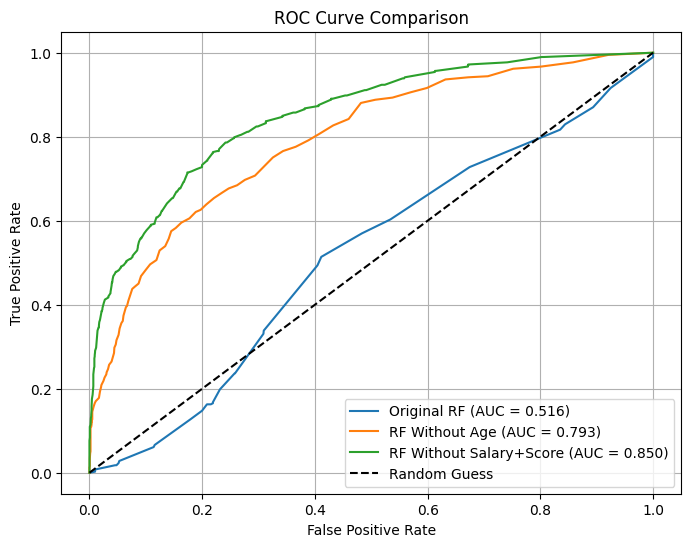

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Original RF
plt.plot(fpr_original, tpr_original, label=f'Original RF (AUC = {auc_original:.3f})')

# Without Age
plt.plot(fpr_no_age, tpr_no_age, label=f'RF Without Age (AUC = {auc_no_age:.3f})')

# Without Salary + CreditScore
plt.plot(fpr_ns, tpr_ns, label=f'RF Without Salary+Score (AUC = {auc_ns:.3f})')

# Random baseline
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


The ROC curve below compares three Random Forest models: the original model using all features, a model without the Age feature and a model without EstimatedSalary and CreditScore.

The original model performs poorly with an AUC close to 0.5, meaning it is almost equivalent to random guessing and fails to distinguish churners from non-churners. Interestingly, when the Age feature is removed, the model’s performance improves significantly (AUC ≈ 0.79), suggesting that Age may have added noise or instability despite appearing important in the global explanation. The best performance is obtained when EstimatedSalary and CreditScore are removed (AUC ≈ 0.85), showing that these two features were not useful for prediction and that removing them helps the model focus on more relevant information.

Overall, this comparison highlights that eliminating certain features can greatly improve model performance, and explainability techniques help us understand which features truly contribute to reliable predictions.

In [ ]:
# Probability predictions
y_proba_ns = rf_no_salary_score.predict_proba(X_test_ns)[:, 1]

# ROC curve
fpr_ns, tpr_ns, _ = roc_curve(y_test_ns, y_proba_ns)
auc_ns = roc_auc_score(y_test_ns, y_proba_ns)

print("AUC - RF Without Salary & CreditScore:", auc_ns)


AUC - RF Without Salary & CreditScore: 0.8503747124143577


###**Local Explanation**

In [ ]:
# # Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['No', 'Exited'],
    mode='classification'
)


# # Plot the LIME explanation
# lime_exp.as_pyplot_figure()


In [ ]:
# Demonstrating explanation stability
instance1 = X_test.iloc[0]
instance2 = X_test.iloc[1731]

In [ ]:
y_test.iloc[0]

np.int64(0)

In [ ]:
y_test.iloc[1731]

np.int64(1)

In [ ]:
# LIME explanations
exp1 = lime_explainer.explain_instance(instance1.values, rf_classifier.predict_proba, num_features=5)
exp2 = lime_explainer.explain_instance(instance2.values, rf_classifier.predict_proba, num_features=5)

print("LIME explanation for instance 1:")
print(exp1.as_list())
print("\nLIME explanation for instance 2:")
print(exp2.as_list())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME explanation for instance 1:
[('Age <= 32.00', -0.1684011462297521), ('1.00 < NumOfProducts <= 2.00', -0.1590904614456797), ('IsActiveMember <= 0.00', 0.1287160407436403), ('0.00 < Gender <= 1.00', -0.0426289624938701), ('0.00 < Geography <= 1.00', 0.03414527310414871)]

LIME explanation for instance 2:
[('Age > 44.00', 0.32786184756242487), ('IsActiveMember <= 0.00', 0.1389689585629227), ('NumOfProducts <= 1.00', 0.08992769193360957), ('0.00 < Gender <= 1.00', -0.053134999597550754), ('Balance <= 0.00', -0.02347831930533287)]


In [ ]:
# # Generate a LIME explanation for a single instance
instance = X_test.iloc[0]
# lime_exp = lime_explainer.explain_instance(instance.values, rf_classifier.predict_proba, num_features=10)


In [ ]:
# Generate LIME explanation for both classes
lime_exp = lime_explainer.explain_instance(
    instance1.values,
    rf_classifier.predict_proba,
    num_features=10,
    labels=[0, 1]  # Force explanation for both classes
)

# Now display both
for label in [0, 1]:
    print(f"\nExplanation for class {lime_exp.class_names[label]}:")
    for feature, weight in lime_exp.as_list(label=label):
        print(f"{feature}: {weight}")



Explanation for class No:
Age <= 32.00: 0.1681010433803803
1.00 < NumOfProducts <= 2.00: 0.1617902418698148
IsActiveMember <= 0.00: -0.1378130123411792
0.00 < Gender <= 1.00: 0.05749515252521579
0.00 < Geography <= 1.00: -0.04414492677337833
96447.52 < Balance <= 127611.33: -0.023404029277700036
585.00 < CreditScore <= 653.00: -0.005890787013126268
EstimatedSalary <= 51364.12: -0.005799564838275791
Tenure <= 3.00: -0.005749327308225837
HasCrCard <= 0.00: 0.0024323252964866676

Explanation for class Exited:
Age <= 32.00: -0.16810104338038026
1.00 < NumOfProducts <= 2.00: -0.1617902418698148
IsActiveMember <= 0.00: 0.1378130123411792
0.00 < Gender <= 1.00: -0.057495152525215754
0.00 < Geography <= 1.00: 0.044144926773378335
96447.52 < Balance <= 127611.33: 0.023404029277700036
585.00 < CreditScore <= 653.00: 0.005890787013126268
EstimatedSalary <= 51364.12: 0.005799564838275781
Tenure <= 3.00: 0.005749327308225849
HasCrCard <= 0.00: -0.002432325296486659


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Les valeurs positives dans une classe favorisent cette classe.

Les valeurs négatives sont en faveur de l’autre classe.

Les grandes valeurs absolues indiquent une forte influence sur la décision.

Condition | Impact sur**"Exited"**

Jeune âge → -0.1689 | Moins probable de quitter

Inactif → +0.1257 | Plus probable de quitter

Num produits bancaires modérés → -0.1535 | Moins probable de quitter

etc. |

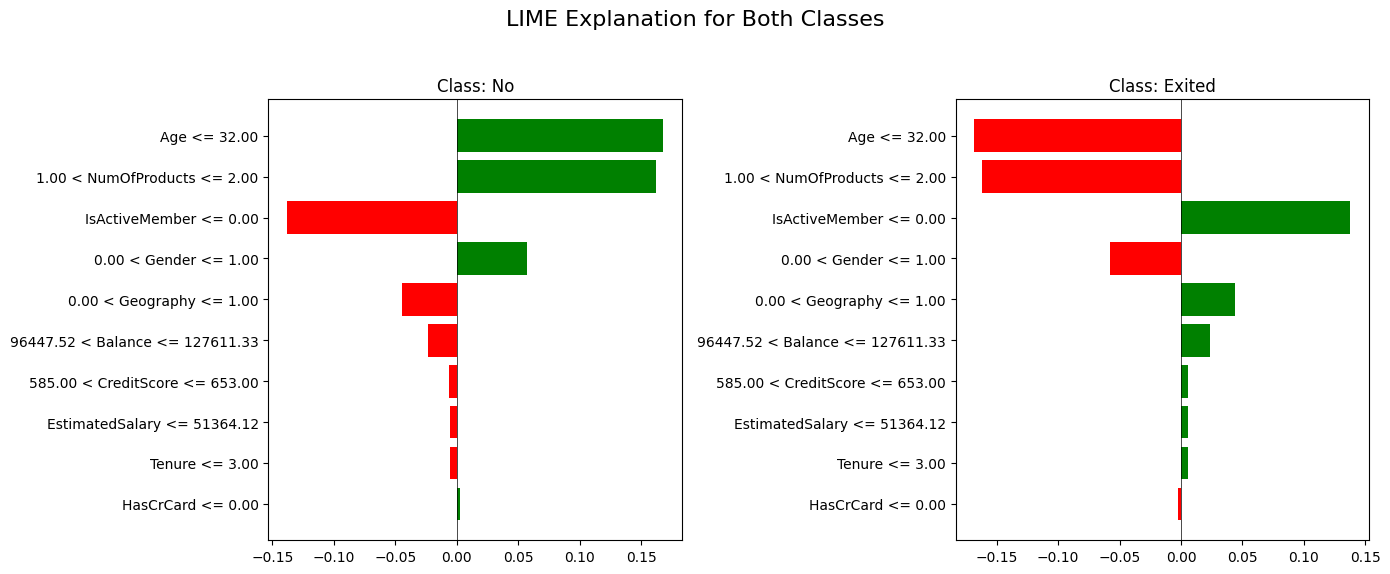

In [ ]:
import matplotlib.pyplot as plt

def plot_lime_explanation(lime_exp, label, ax, class_name):
    exp = lime_exp.as_list(label=label)
    features = [x[0] for x in exp]
    weights = [x[1] for x in exp]

    colors = ['green' if w > 0 else 'red' for w in weights]

    ax.barh(features, weights, color=colors)
    ax.set_title(f"Class: {class_name}")
    ax.axvline(0, color='black', linewidth=0.5)
    ax.invert_yaxis()  # Highest weight on top

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("LIME Explanation for Both Classes", fontsize=16)

# Plot manually for both classes
plot_lime_explanation(lime_exp, label=0, ax=axes[0], class_name="No")
plot_lime_explanation(lime_exp, label=1, ax=axes[1], class_name="Exited")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##ANN

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
scaler_ann = StandardScaler()
X_train_ann = scaler_ann.fit_transform(X_train)
X_test_ann = scaler_ann.transform(X_test)


In [ ]:
ann_model = Sequential()
ann_model.add(Dense(16, activation='relu', input_shape=(X_train_ann.shape[1],)))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = ann_model.fit(X_train_ann, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)


In [ ]:
loss, acc = ann_model.evaluate(X_test_ann, y_test, verbose=0)
print("ANN Test Accuracy:", acc)

ANN Test Accuracy: 0.862500011920929


###Global Explanation

In [ ]:
import shap
import numpy as np


X_background = shap.sample(X_train_ann, 50)

pred_fn = lambda x: ann_model.predict(x).flatten()

explainer_ann = shap.KernelExplainer(pred_fn, X_background)

X_sample = X_test_ann[:100]
shap_values_ann = explainer_ann.shap_values(X_sample)

shap_values_fixed = np.squeeze(shap_values_ann)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

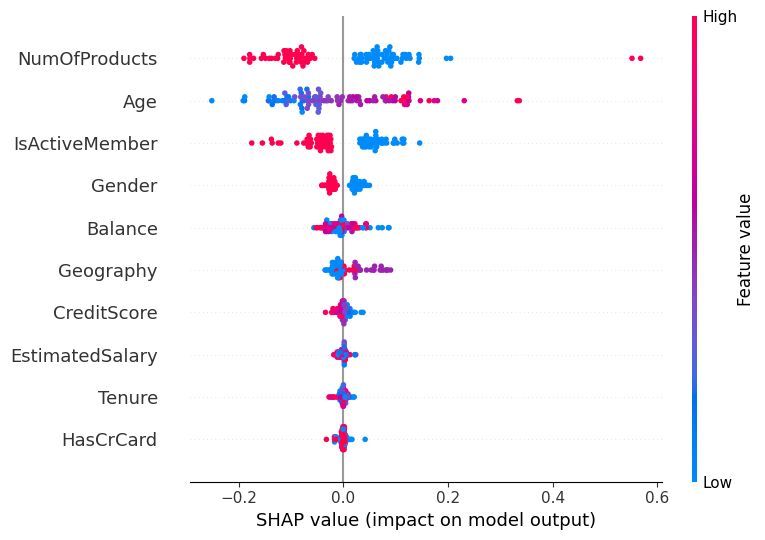

In [ ]:
shap.summary_plot(shap_values_fixed, X_sample, feature_names=X.columns)

The SHAP summary plot for the ANN model shows which features have the biggest influence on the model’s predictions for customer churn. The feature that stands out the most is NumOfProducts, which means the number of products a customer has plays a major role in how the ANN decides whether they might leave or not. When the value of NumOfProducts is high (red dots), it tends to push the prediction toward churn. Age is also an important factor: older customers usually increase the probability of churn, while younger customers decrease it. Another strong feature is IsActiveMember, where being inactive has a clear positive impact on churn. Features like Gender, Balance, and Geography show moderate influence, meaning they sometimes affect the prediction but not as consistently. On the other hand, CreditScore, EstimatedSalary, Tenure, and HasCrCard have very small SHAP values, which suggests that the ANN model does not rely heavily on them when making decisions. Overall, this plot gives a good global view of how the ANN behaves and which features matter most for predicting churn.

In [ ]:
loss, acc = ann_model.evaluate(X_test_ann, y_test)
print(acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.3390
0.862500011920929


###Local Explanation

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


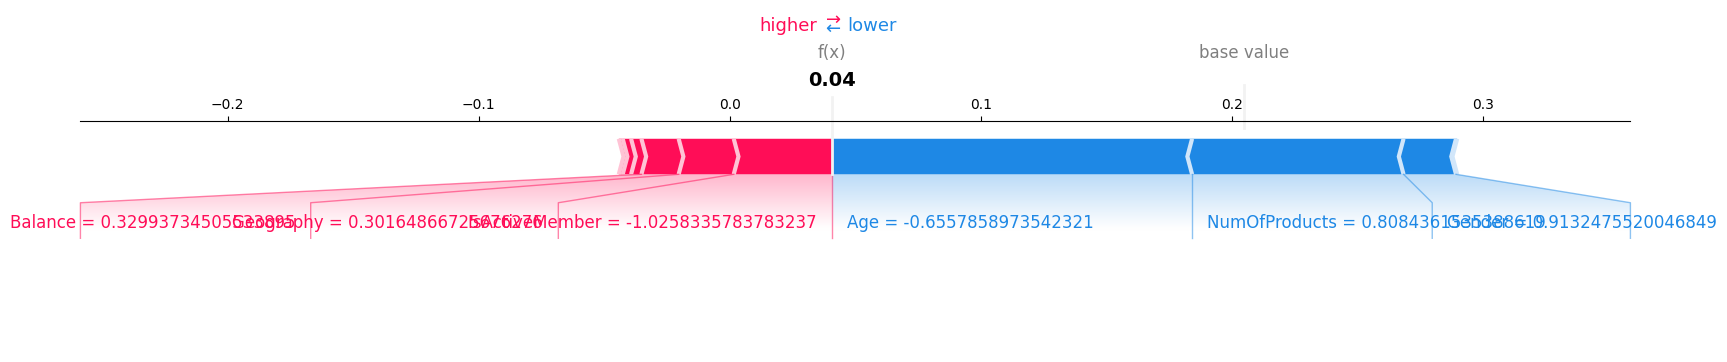

In [ ]:
i = 0
sample = X_test_ann[i:i+1]

shap_values_single = explainer_ann.shap_values(sample)

# Squeeze the shap_values to ensure it's 1D for a single sample
# shap_values_single[0] will be (10, 1) before squeezing, we want (10,)
# sample will be (1, 10) before squeezing, we want (10,)
shap.force_plot(explainer_ann.expected_value[0],
                shap_values_single[0].squeeze(), # Squeeze the SHAP values
                sample.squeeze(),                # Squeeze the sample features
                feature_names=X.columns,
                matplotlib=True)